In [1]:
import logging

import graphcat.notebook
import imagecat.notebook

logging.basicConfig(level=logging.DEBUG)

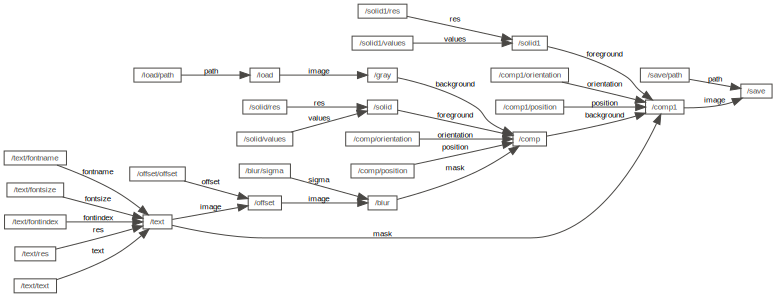

DEBUG:imagecat.io:{'srgb': 1, 'Artist': 'tshead', 'Comment': 'none'}
INFO:imagecat.operator:Task /load load:
INFO:imagecat.operator:  layers: *
INFO:imagecat.operator:  path: ../artwork/logo.png
INFO:imagecat.operator:  output: Image(C: Layer(2560x1440x3 float16 ['r', 'g', 'b'] Role.RGB), A: Layer(2560x1440x1 float16 [''] Role.NONE))
INFO:imagecat.operator:Task /solid fill:
INFO:imagecat.operator:  components: ['r', 'g', 'b']
INFO:imagecat.operator:  layer: C
INFO:imagecat.operator:  res: [500 200]
INFO:imagecat.operator:  role: Role.RGB
INFO:imagecat.operator:  values: [0 0 0]
INFO:imagecat.operator:  output: Image(C: Layer(500x200x3 float16 ['r', 'g', 'b'] Role.RGB))
INFO:imagecat.operator:Task /text fontname: HelveticaNeue
INFO:imagecat.operator:Task /text text:
INFO:imagecat.operator:  anchor: mm
INFO:imagecat.operator:  fontindex: 4
INFO:imagecat.operator:  fontname: HelveticaNeue
INFO:imagecat.operator:  fontsize: 96
INFO:imagecat.operator:  layer: A
INFO:imagecat.operator:  posi


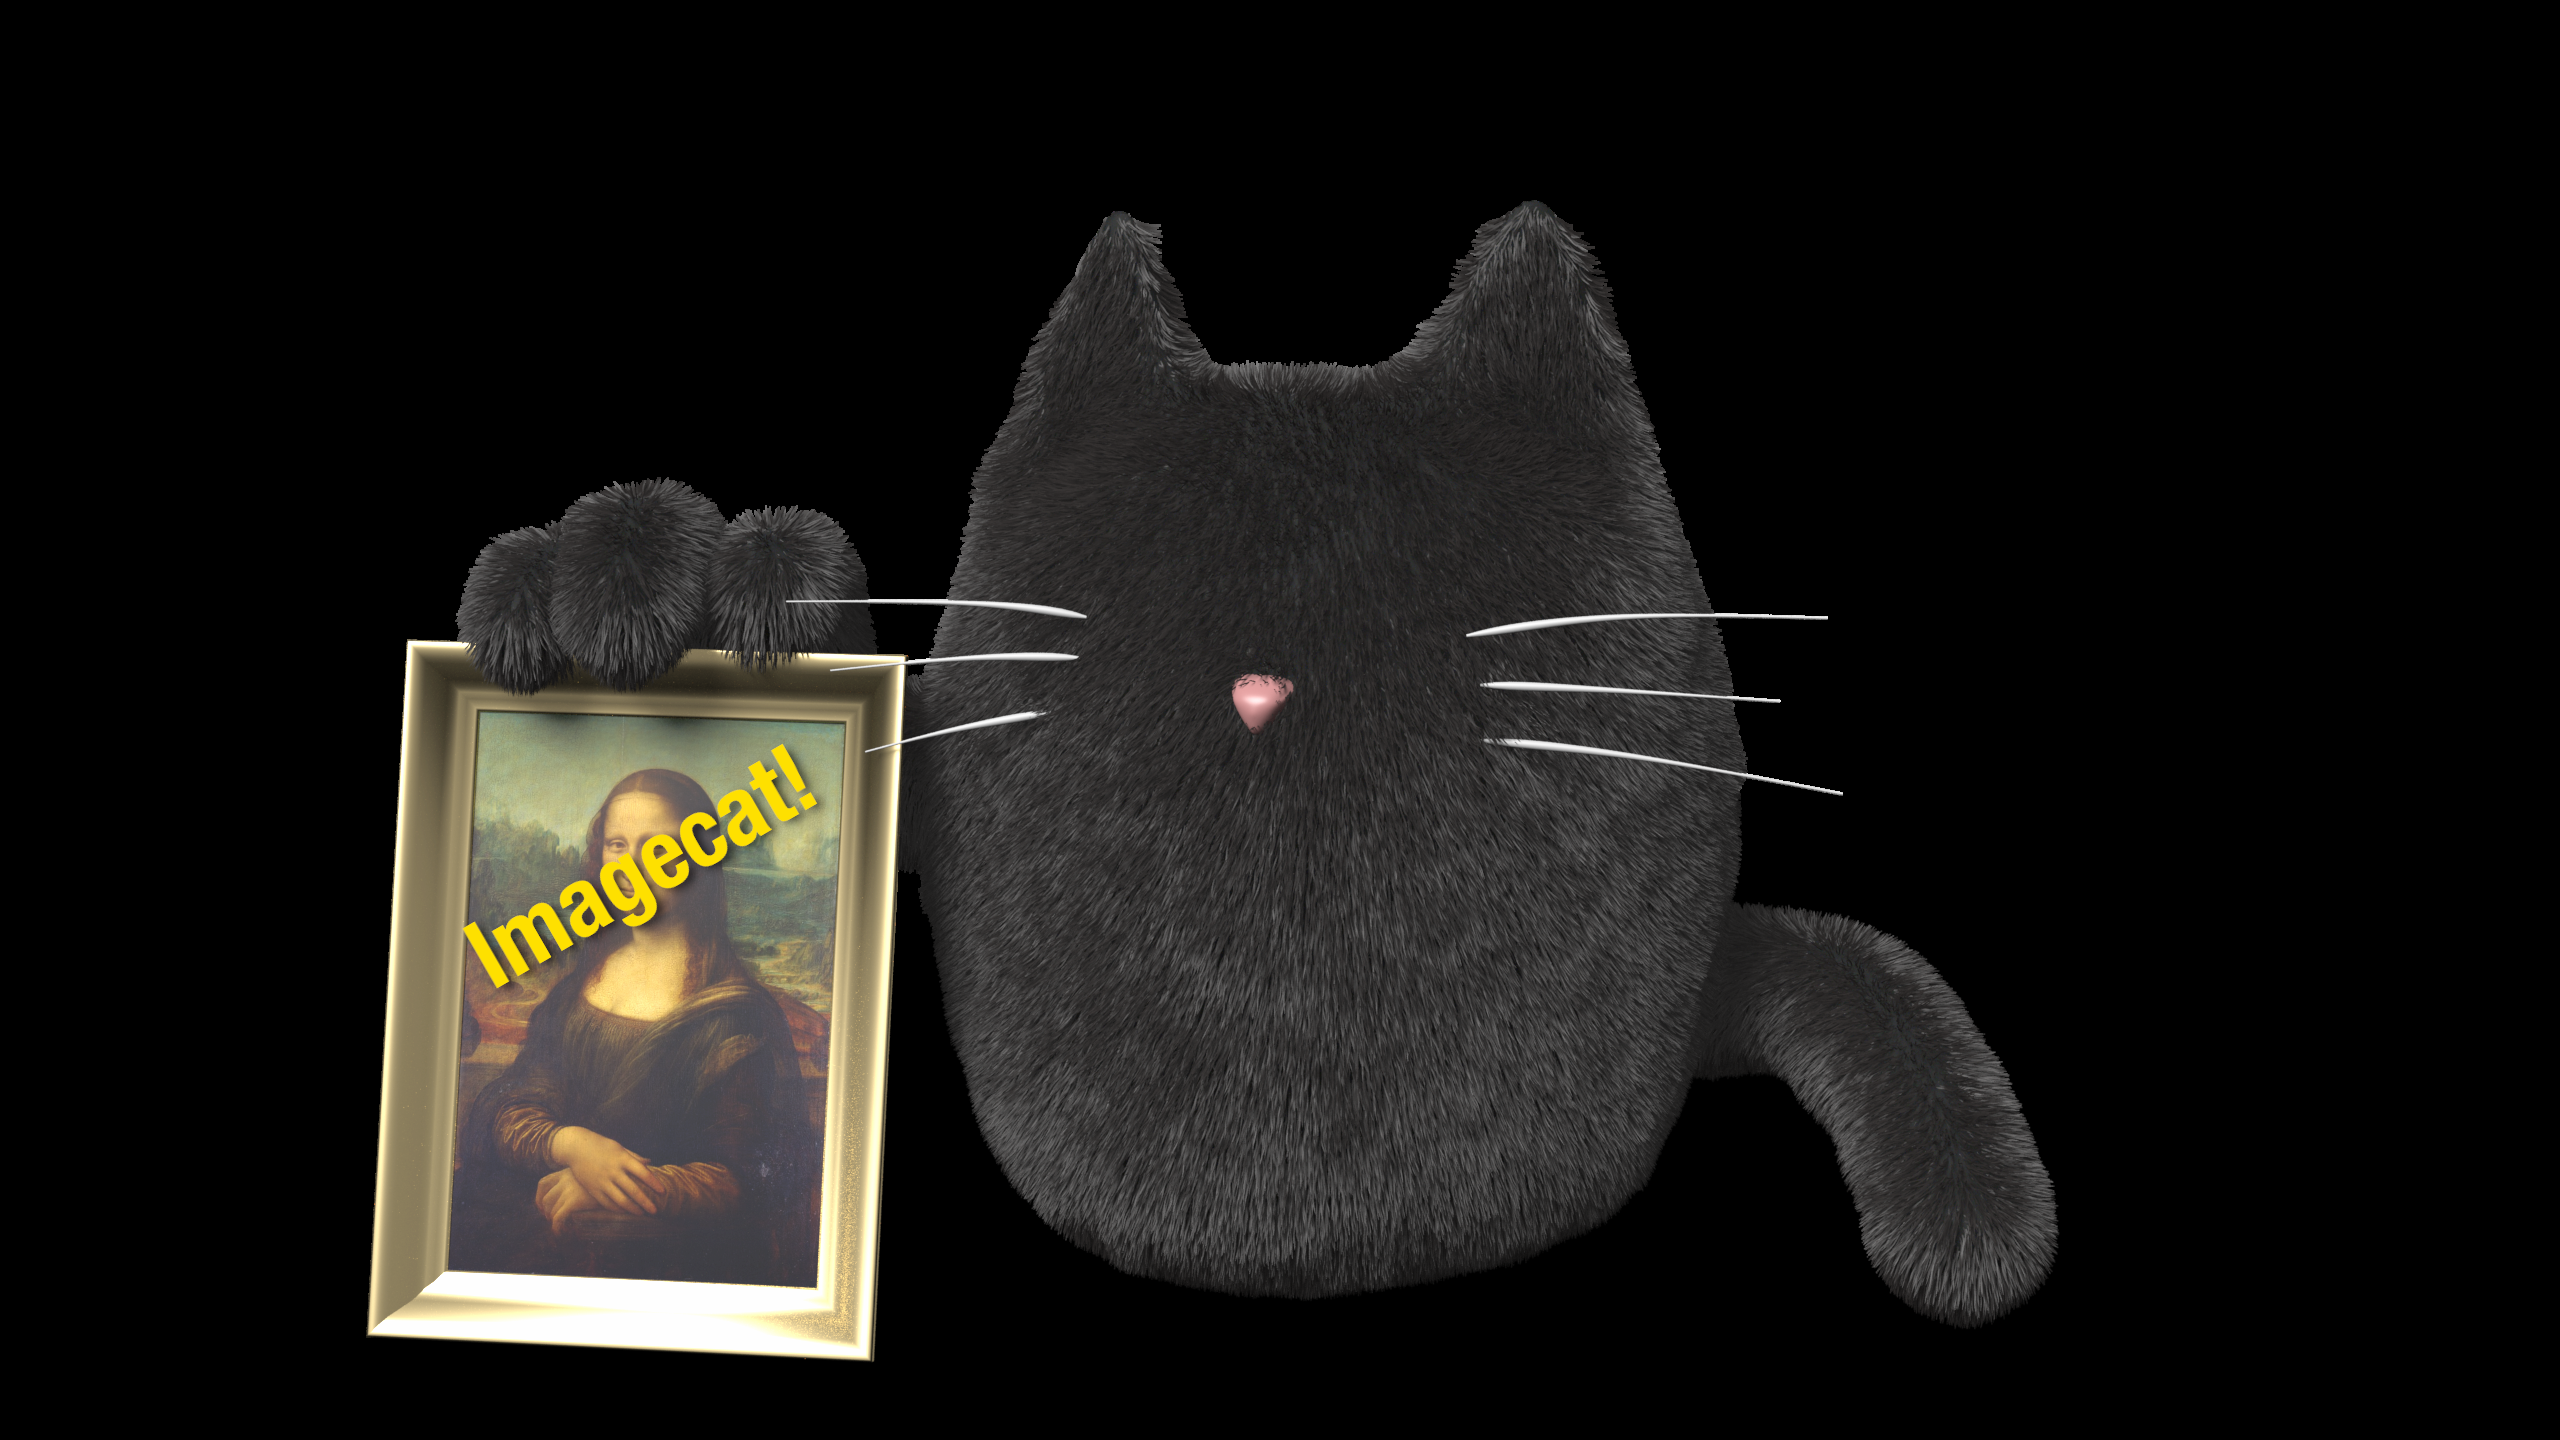

In [2]:
graph = graphcat.DynamicGraph()

text = imagecat.add_task(graph, "/text", imagecat.operator.text, fontname="HelveticaNeue", fontsize=96, fontindex=4, res=(500, 200), text="Imagecat!")
offset = imagecat.add_task(graph, "/offset", imagecat.operator.offset, offset=("5px", "-6px"))
blur = imagecat.add_task(graph, "/blur", imagecat.operator.gaussian, sigma="4px")
graph.add_links(text, (offset, "image"))
graph.add_links(offset, (blur, "image"))

file = imagecat.add_task(graph, "/load", imagecat.operator.load, path="../artwork/logo.png")
#gray = imagecat.add_task(graph, "/gray", imagecat.operator.rgb2gray)
gray = imagecat.add_task(graph, "/gray", graphcat.passthrough("image"))
graph.set_links(file, (gray, "image"))

solid = imagecat.add_task(graph, "/solid", imagecat.operator.fill, res=(500, 200), values=[0, 0, 0])
comp = imagecat.add_task(graph, "/comp", imagecat.operator.composite, orientation=30, position=("0.25w", "0.4h"))
graph.set_links(solid, (comp, "foreground"))
graph.set_links(gray, (comp, "background"))
graph.set_links(blur, (comp, "mask"))

solid = imagecat.add_task(graph, "/solid", imagecat.operator.fill, res=(500, 200), values=[1, 0.75, 0])
comp2 = imagecat.add_task(graph, "/comp", imagecat.operator.composite, orientation=30, position=("0.25w", "0.4h"))
graph.set_links(solid, (comp2, "foreground"))
graph.set_links(comp, (comp2, "background"))
graph.add_links(text, (comp2, "mask"))

save = imagecat.add_task(graph, "/save", imagecat.operator.save, path="test.exr")
graph.add_links(comp2, (save, "image"))

graphcat.notebook.display(graph)
imagecat.notebook.display(graph.output(comp2))


In [3]:
graph.update("/save")

In [4]:
graph.set_task("/save/path", graphcat.constant("test.png"))
graph.update("/save")


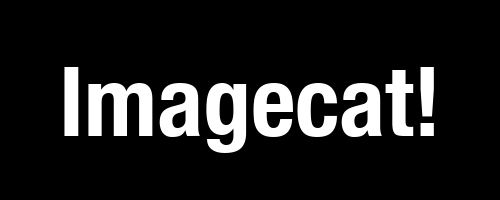

In [5]:
imagecat.notebook.display(graph.output("/text"))